# Determining correct thresholds with elbow method

In [1]:
import os
import json
import matplotlib.pyplot as plt
from kneed import KneeLocator

ANALYSIS_DATA_DIR = "../threshold_analysis_data"

## Prepare data

Extract values from file

In [3]:
bumpy_data = {}
fpc_data = {}
lcom5_data = {}
lcom4_data = {}


i = 2    
for filename in os.listdir(ANALYSIS_DATA_DIR):
    if filename.endswith(".json"):  # Adjust for file format
        filepath = os.path.join(ANALYSIS_DATA_DIR, filename)
        with open(filepath, "r") as file:
            json_object = json.load(file)
            projects = [{"project_id": key, **value} for key, value in json_object.items()]
            bumpy_sum_score = 0
            fpc_sum_score = 0
            lcom5_sum_score = 0
            lcom4_sum_score = 0

            for project in projects:
                bumpy_sum_score += project["bumpy_score"]
                fpc_sum_score += project["fpc_score"]
                lcom5_sum_score += project["lcom5_score"]
                lcom4_sum_score += project["lcom4_score"]
                
            bumpy_data[i] = bumpy_sum_score
            fpc_data[i] = fpc_sum_score
            lcom5_data[i] = lcom5_sum_score
            lcom4_data[i] = lcom4_sum_score
        i += 1

print(bumpy_data)
print(fpc_data)
print(lcom5_data)
print(lcom4_data)

{2: 3395, 3: 2172, 4: 1104, 5: 642, 6: 367, 7: 214, 8: 109, 9: 58, 10: 36}
{2: 2351, 3: 490, 4: 237, 5: 83, 6: 40, 7: 18, 8: 12, 9: 9, 10: 8}
{2: 906, 3: 906, 4: 906, 5: 906, 6: 906, 7: 906, 8: 906, 9: 906, 10: 906}
{2: 846, 3: 685, 4: 522, 5: 427, 6: 360, 7: 326, 8: 270, 9: 242, 10: 212}


Convert data

In [6]:
bumpy_x = list(bumpy_data.keys())  # Thresholds
bumpy_y = list(bumpy_data.values())  # Total alerts

fpc_x = list(fpc_data.keys())  # Thresholds
fpc_y = list(fpc_data.values())  # Total alerts

lcom5_x = [t / 10 for t in lcom5_data.keys()] 
lcom5_y = list(lcom5_data.values())  # Total alerts

lcom4_x = list(lcom4_data.keys())
lcom4_y = list(lcom4_data.values())  # Total alerts

## Plot elbows

### Bumpy road

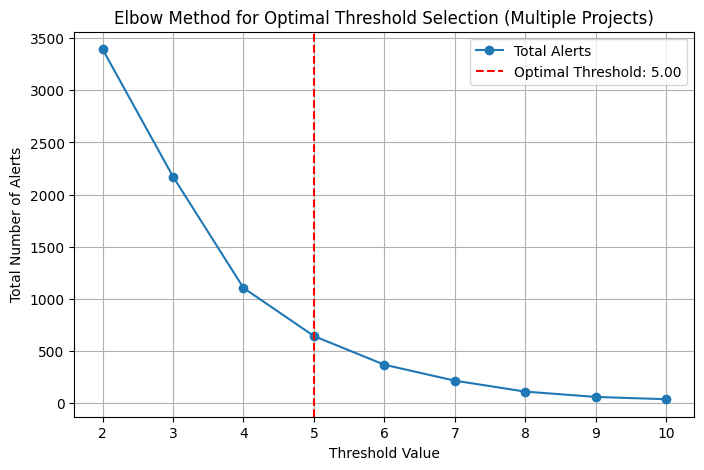

✅ Optimal threshold found: 5


In [7]:
# Find the elbow point
knee = KneeLocator(bumpy_x, bumpy_y, curve="convex", direction="decreasing")

# Plot the results
plt.figure(figsize=(8, 5))
plt.plot(bumpy_x, bumpy_y, marker='o', label="Total Alerts")
plt.axvline(x=knee.knee, color='r', linestyle="--", label=f"Optimal Threshold: {knee.knee:.2f}")
plt.xlabel("Threshold Value")
plt.ylabel("Total Number of Alerts")
plt.title("Elbow Method for Optimal Threshold Selection (Multiple Projects)")
plt.legend()
plt.grid(True)
plt.show()

print(f"✅ Optimal threshold found: {knee.knee}")

### Function parameter count

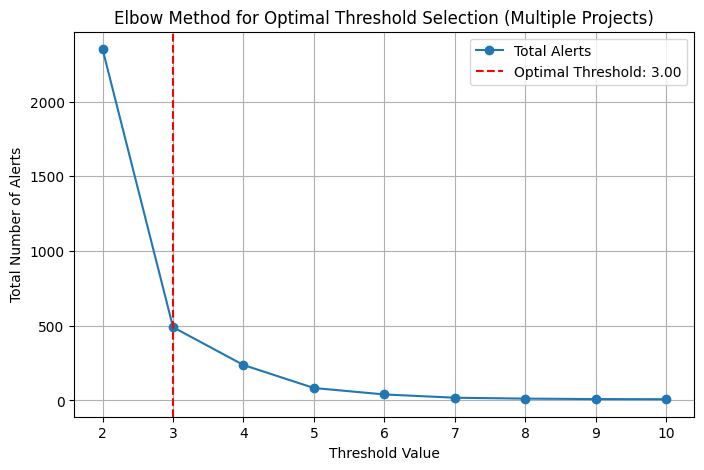

✅ Optimal threshold found: 3


In [8]:
# Find the elbow point
knee = KneeLocator(fpc_x, fpc_y, curve="convex", direction="decreasing")

# Plot the results
plt.figure(figsize=(8, 5))
plt.plot(fpc_x, fpc_y, marker='o', label="Total Alerts")
plt.axvline(x=knee.knee, color='r', linestyle="--", label=f"Optimal Threshold: {knee.knee:.2f}")
plt.xlabel("Threshold Value")
plt.ylabel("Total Number of Alerts")
plt.title("Elbow Method for Optimal Threshold Selection (Multiple Projects)")
plt.legend()
plt.grid(True)
plt.show()

print(f"✅ Optimal threshold found: {knee.knee}")

### LCOM5

c:\Users\csasz\Documents\git_projects\code-metrics\gitlab_extractor\.venv\Lib\site-packages\kneed\knee_locator.py:225: RuntimeWarning: invalid value encountered in divide
  return (a - min(a)) / (max(a) - min(a))


TypeError: unsupported format string passed to NoneType.__format__

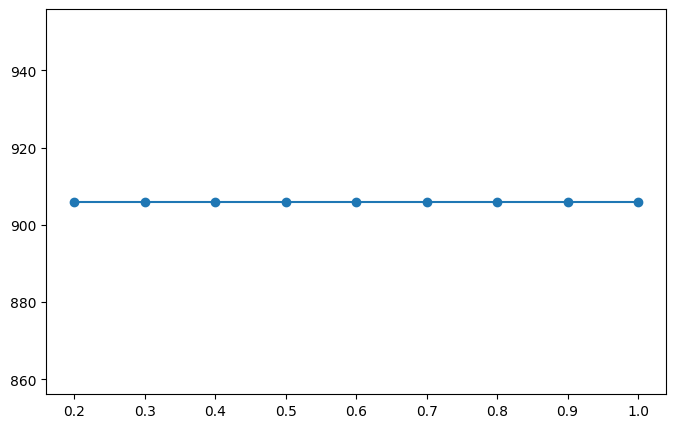

In [9]:
# Find the elbow point
knee = KneeLocator(lcom5_x, lcom5_y, curve="convex", direction="decreasing")

# Plot the results
plt.figure(figsize=(8, 5))
plt.plot(lcom5_x, lcom5_y, marker='o', label="Total Alerts")
plt.axvline(x=knee.knee, color='r', linestyle="--", label=f"Optimal Threshold: {knee.knee:.2f}")
plt.xlabel("Threshold Value")
plt.ylabel("Total Number of Alerts")
plt.title("Elbow Method for Optimal Threshold Selection (Multiple Projects)")
plt.legend()
plt.grid(True)
plt.show()

print(f"✅ Optimal threshold found: {knee.knee}")

### LCOM4

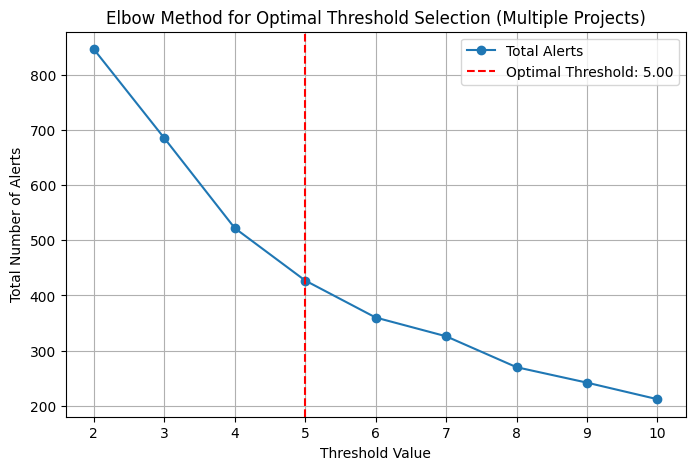

✅ Optimal threshold found: 5


In [11]:
# Find the elbow point
knee = KneeLocator(lcom4_x, lcom4_y, curve="convex", direction="decreasing")

# Plot the results
plt.figure(figsize=(8, 5))
plt.plot(lcom4_x, lcom4_y, marker='o', label="Total Alerts")
plt.axvline(x=knee.knee, color='r', linestyle="--", label=f"Optimal Threshold: {knee.knee:.2f}")
plt.xlabel("Threshold Value")
plt.ylabel("Total Number of Alerts")
plt.title("Elbow Method for Optimal Threshold Selection (Multiple Projects)")
plt.legend()
plt.grid(True)
plt.show()

print(f"✅ Optimal threshold found: {knee.knee}")